# Breast Cancer Detection
To detect wheter the cancer is M = malignant, B = benign.Malignant is the tumor that contains cancerous cells while Benign does not. There are three models used in this project: decision Tree, Random Forest, Logistic Regression. 

In [1]:
#Importing necessary library for this project
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import seaborn as sns

### Loading the dataset
We now need to load the dataset. The dataset used is from kaggle breastCancerData.csv. <br> Attribute information:<br>id	diagnosis,	radius_mean	texture_mean,	perimeter_mean,	area_mean,	smoothness_mean,	compactness_mean, concavity_mean, concave points_mean, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst,	fractal_dimension_worst

In [2]:
#Loading data
df=pd.read_csv('./breastCancerdata.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing and Cleaning

In [3]:
df.isna().sum()#Counting number of NaN,nan values in the dataset 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
#Data preprocessing
df.drop('Unnamed: 32',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)
print(df.axes)
df.shape
df.head()

[RangeIndex(start=0, stop=569, step=1), Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
df['diagnosis']=df.diagnosis.map({'M':1,'B':0})# we can use preprocessing.LableEncoder

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Visualization And Exploration

In [8]:
#Data Visualization
print(df.loc[2])#for any location
print(df.describe())

diagnosis                     1.000000
radius_mean                  19.690000
texture_mean                 21.250000
perimeter_mean              130.000000
area_mean                  1203.000000
smoothness_mean               0.109600
compactness_mean              0.159900
concavity_mean                0.197400
concave points_mean           0.127900
symmetry_mean                 0.206900
fractal_dimension_mean        0.059990
radius_se                     0.745600
texture_se                    0.786900
perimeter_se                  4.585000
area_se                      94.030000
smoothness_se                 0.006150
compactness_se                0.040060
concavity_se                  0.038320
concave points_se             0.020580
symmetry_se                   0.022500
fractal_dimension_se          0.004571
radius_worst                 23.570000
texture_worst                25.530000
perimeter_worst             152.500000
area_worst                 1709.000000
smoothness_worst         

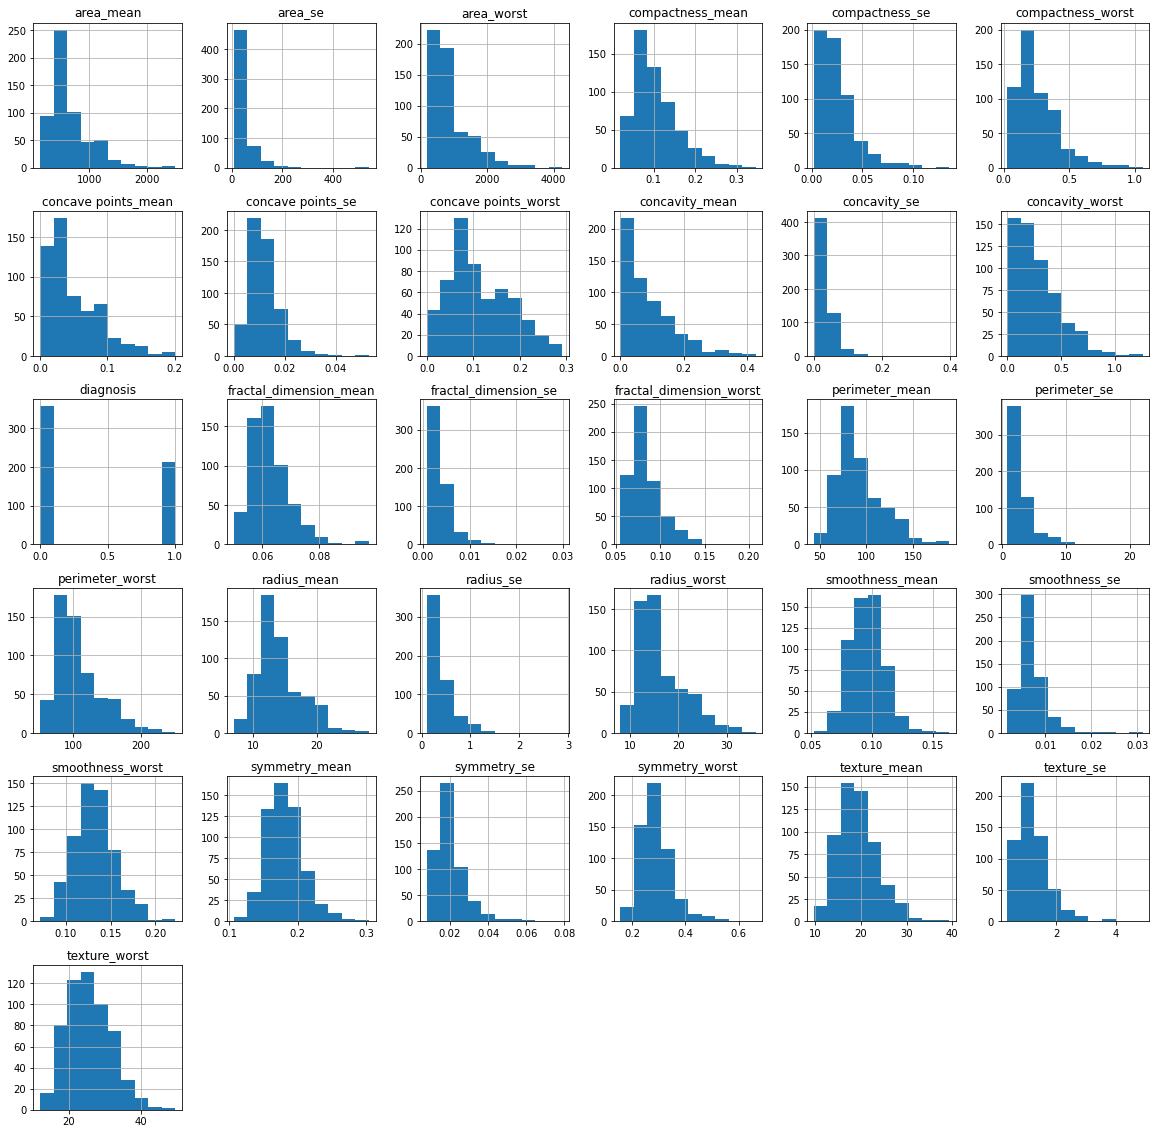

In [9]:
#plotting histogram for each variable
df.hist(figsize= (20,20))
plt.show()

In [10]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

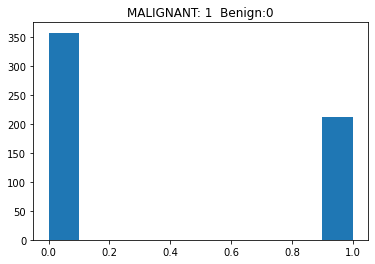

In [11]:
#sns.countplot(df['diagnosis'],label='count')
plt.hist(df['diagnosis'])
plt.title("MALIGNANT: 1  Benign:0")
plt.show()

In [12]:
#Look at the data type to see the columns need to be encoded
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

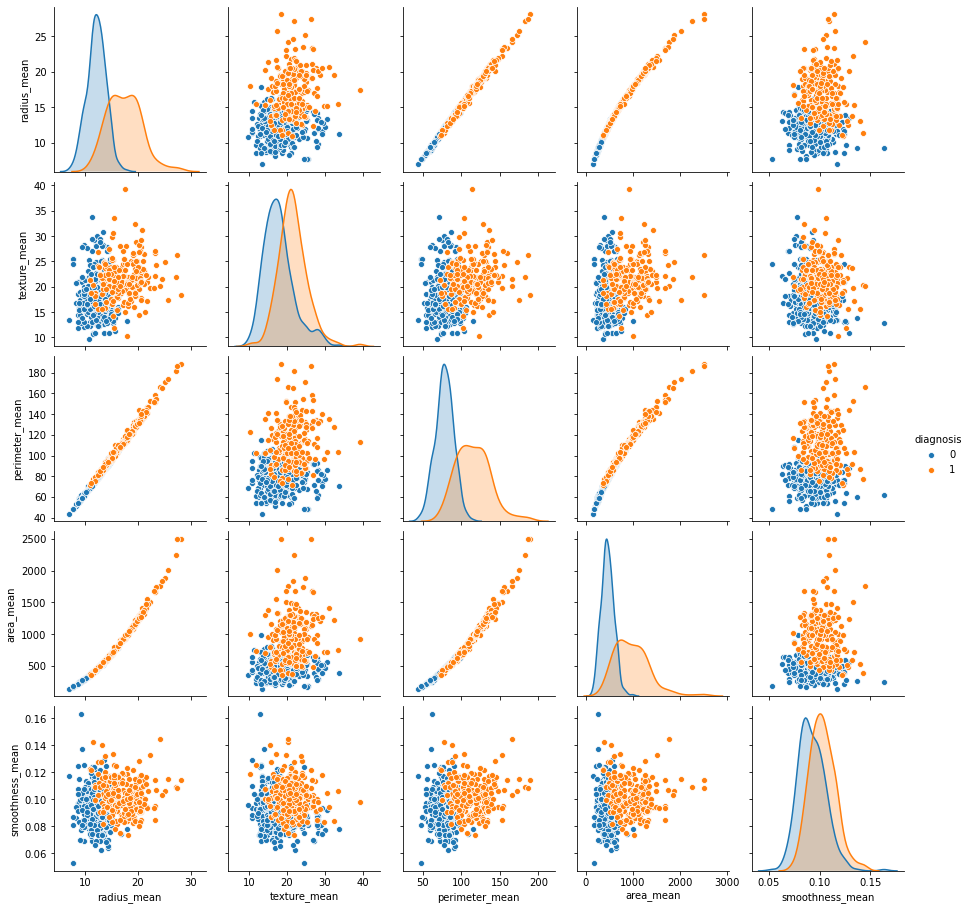

In [39]:
#Creating pair plot
sns.pairplot(df.iloc[:,0:6],hue='diagnosis')

In [40]:
#Get Corelation column
df.iloc[:,0:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379


This tells the corelation between each other. example, radius_mean as positive corelation with diagnnosis column, smoothness_mean hae negative corelation with texture_mean,etc.

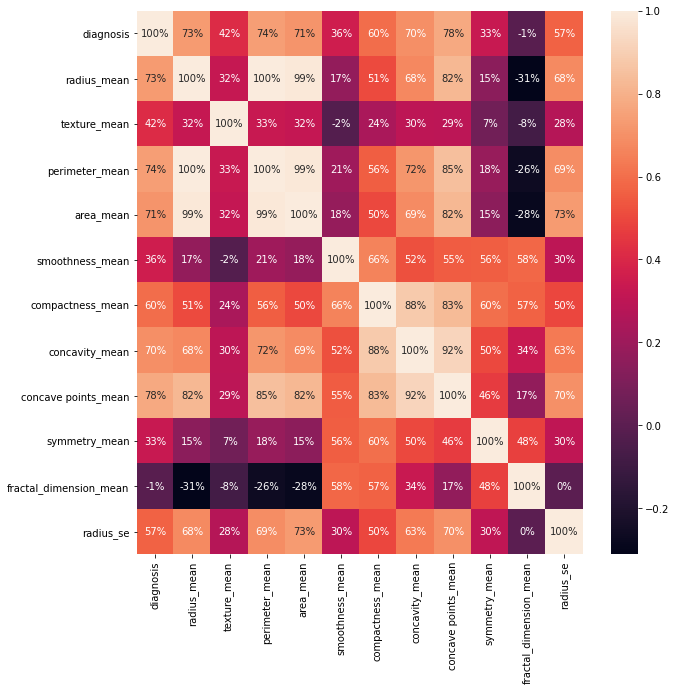

In [63]:
#Visualizing the corelation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:12].corr(),annot=True,fmt='.0%')

## Working On The Actual Model

In [53]:
#Split the data into independent (X) and dependent(Y) data set.
X=df.iloc[:,1:30].values
Y=df.iloc[:,0].values
type(X)

numpy.ndarray

In [54]:
#Splitting the data set into 75% training set and 25% test set. Creating the test and train set.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print ("X_train: ", X_train)
print ("Y_train: ", Y_train)
print("X_test: ", X_test)
print ("Y_test: ", Y_test)

X_train:  [[1.185e+01 1.746e+01 7.554e+01 ... 1.316e-01 9.140e-02 3.101e-01]
 [1.122e+01 1.986e+01 7.194e+01 ... 1.335e-02 2.022e-02 3.292e-01]
 [2.013e+01 2.825e+01 1.312e+02 ... 3.215e-01 1.628e-01 2.572e-01]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 1.144e-01 5.052e-02 2.454e-01]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 0.000e+00 1.909e-01]
 [1.151e+01 2.393e+01 7.452e+01 ... 3.630e-01 9.653e-02 2.112e-01]]
Y_train:  [0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 

In [55]:
#Feature Scaling applied on independent data (X)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.69592933,
        -0.36433881,  0.32349851],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.29277423,
        -1.45036679,  0.62563098],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.26255563,
         0.72504581, -0.51329768],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.78274313,
        -0.98806491, -0.69995543],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.36015587,
        -1.75887319, -1.56206114],
       [-0.74662205,  1.14066273, -0.72203706, ...,  0.47201917,
        -0.2860679 , -1.24094654]])

### Logistic Regression: 
It is a classification model used when the dependent variableis categorical.
### Decision Trees:
It is a supervised learning algorithm which is used for both classification and regression problems in the form of trees that can be incrementally updated by splitting the dataset into smaller datasets. The result is stored in the leaf node.
### Random Forests Classifier: 
Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. 

In [56]:
#Creating a function for the model
def model(X_train,Y_train):
    #Logistic regression
    from sklearn.linear_model import LogisticRegression
    logreg=LogisticRegression(random_state=0)
    logreg.fit(X_train,Y_train)
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    #RandomForest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    #Print Model Accuracy
    print('[0] Logistic Regression Training accuracy:',logreg.score(X_train,Y_train))
    print('[1] Decision Tree Classifier Training accuracy:',tree.score(X_train,Y_train))
    print('[2] Random Forest Training accuracy:',forest.score(X_train,Y_train))
    
    return logreg,tree,forest

In [57]:
#Getting all the models
model=model(X_train,Y_train)

[0] Logistic Regression Training accuracy: 0.9906103286384976
[1] Decision Tree Classifier Training accuracy: 1.0
[2] Random Forest Training accuracy: 0.9953051643192489


### Confusion Matrix:
It is the tabular summary of the number of correct and incorrect predictions made by the classifier. 
            
            | TruePositive  | FalsePositive |
            |---------------|---------------|
            | FalseNegative | TrueNegative  |

In [62]:
#Testing the model on test data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    print("MODEL: ",i)
    cm=confusion_matrix(Y_test,model[i].predict(X_test))
    #Confusion Matrix shows TruePositive(TP),TrueNegative(TN),FalsePositive(FP),FalseNegative(FN)
    TP=cm[0][0]
    FP=cm[0][1]
    TN=cm[1][1]
    FN=cm[1][0]
    print(cm)
    print("Testing Accuracy: ",(TP+TN)/(TP+TN+FP+FN))
    print()

MODEL:  0
[[86  4]
 [ 4 49]]
Testing Accuracy:  0.9440559440559441

MODEL:  1
[[84  6]
 [ 1 52]]
Testing Accuracy:  0.951048951048951

MODEL:  2
[[87  3]
 [ 2 51]]
Testing Accuracy:  0.965034965034965



### Test Prediction Accuracy
The prediction accuracy for the test data set using the above logistic Regression model  is 94%<br>The prediction accuracy for the test data set using the above Decision Tree Classifier model is 95%<br>The prediction accuracy for the test data set using the above Random Forest model is 96%
### The best model to be used for diagnosing breast cancer as found in this analysis is the Random Forests Classifier model with 96% accuracy.

In [59]:
#Print pridicted Value of Random Forest Classifier Since it have the highest accuracy
pred=model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
